In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Datasets
tips = sns.load_dataset('tips')
flights = sns.load_dataset("flights")
titanic = sns.load_dataset("titanic")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Skewness:  1.1332130376158205


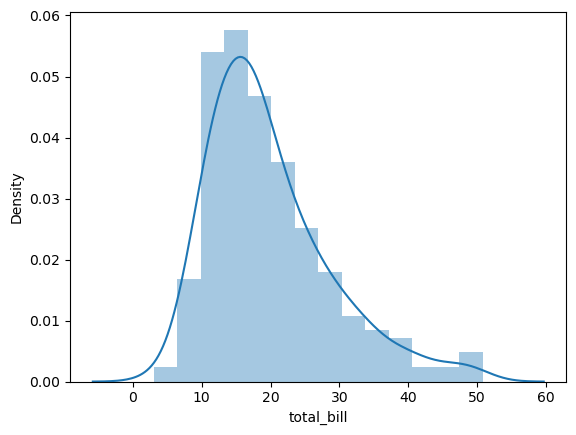

In [4]:
# Univariate analysis using distplot
sns.distplot(tips['total_bill'])
print("Skewness: ",tips['total_bill'].skew())

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

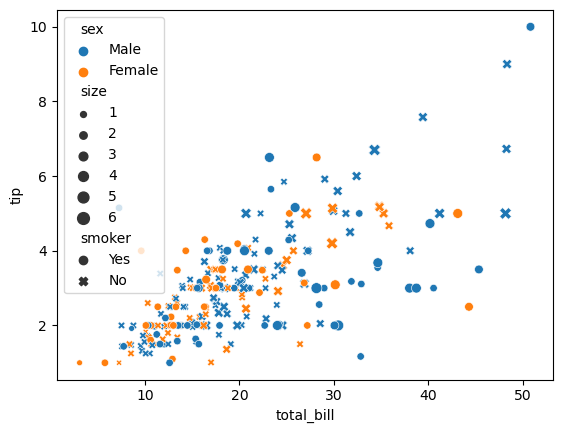

In [5]:
# Multivariate and bivariate
# NUmerical to numerical
sns.scatterplot(tips['total_bill'] , tips['tip'] ,hue = tips['sex'] , style=tips['smoker'] , size=tips['size'])

<AxesSubplot:xlabel='pclass', ylabel='age'>

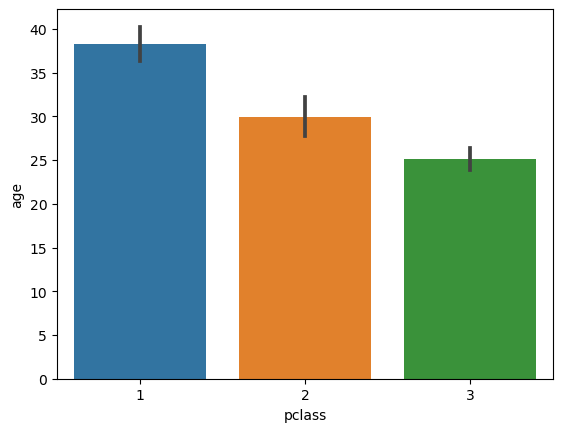

In [6]:
# Categorical to numerical
sns.barplot(x = 'pclass' , y = 'age' , data = titanic, estimator=np.mean)

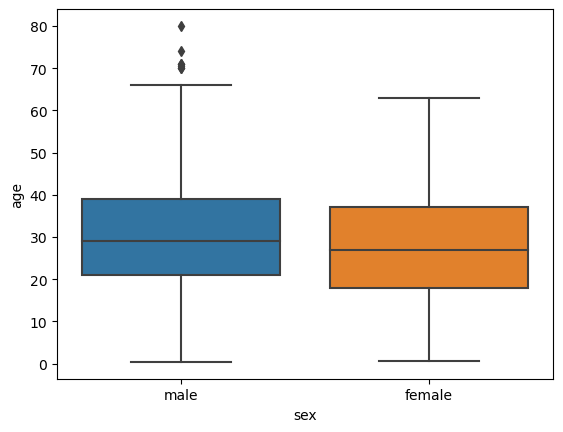

In [7]:
# Boxplot for cat to num
sns.boxplot(x = 'sex' , y = 'age' , data = titanic)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

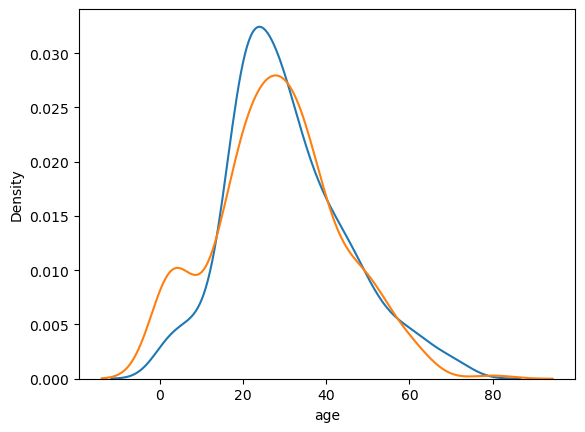

In [8]:
# num to cat (You can Gather a lot of information)
sns.distplot(titanic[titanic['survived'] == 0]['age'] , hist = False)
sns.distplot(titanic[titanic['survived'] == 1]['age'] , hist = False)

In [9]:
# Heatmap Cat to Cat
pd.crosstab(titanic['pclass'] , titanic['survived'])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='survived', ylabel='pclass'>

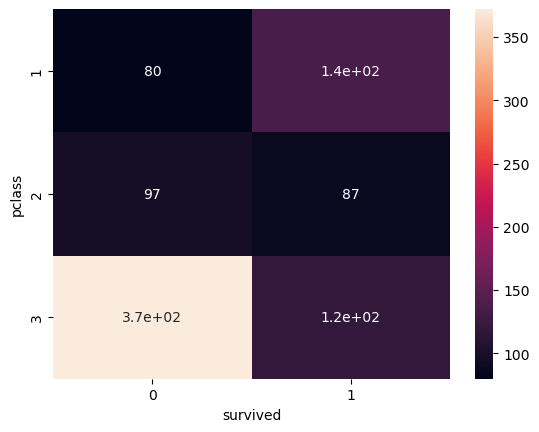

In [10]:
sns.heatmap(pd.crosstab(titanic['pclass'] , titanic['survived']) , annot=True)

In [11]:
# % of survived pclass wise
titanic.groupby('pclass').mean()['survived']*100

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

In [12]:
# % of survived sex  wise
titanic.groupby('sex').mean()['survived']*100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

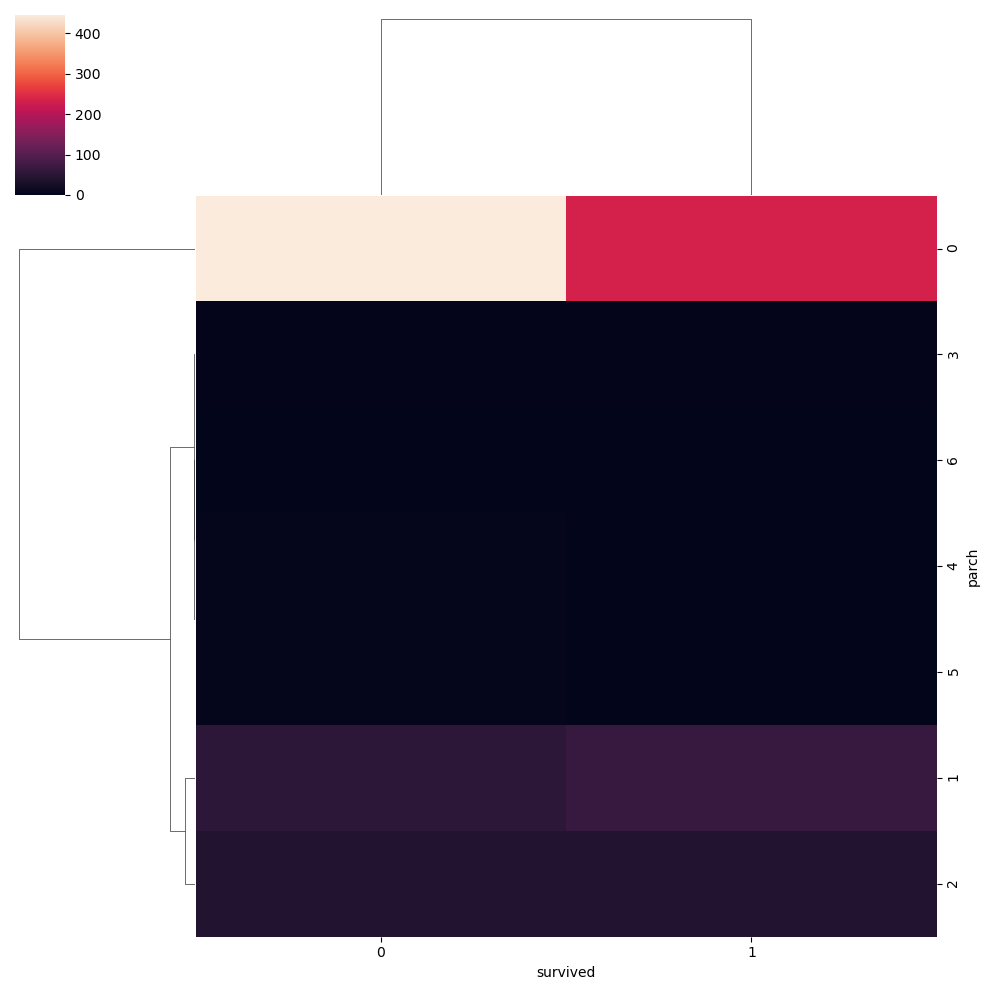

In [13]:
# CLustermap for cat to cat
sns.clustermap(pd.crosstab(titanic['parch'] , titanic['survived']))

In [19]:
# Line Plot (Numeric to numeric)
new = flights.groupby('year').sum().reset_index()

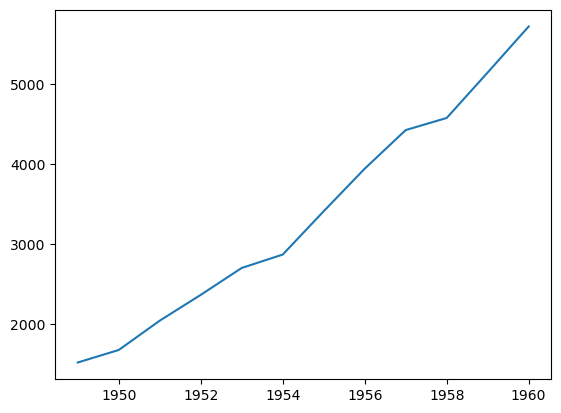

In [23]:
plt.plot(new['year'],new['passengers'])
plt.show()

<AxesSubplot:xlabel='year', ylabel='month'>

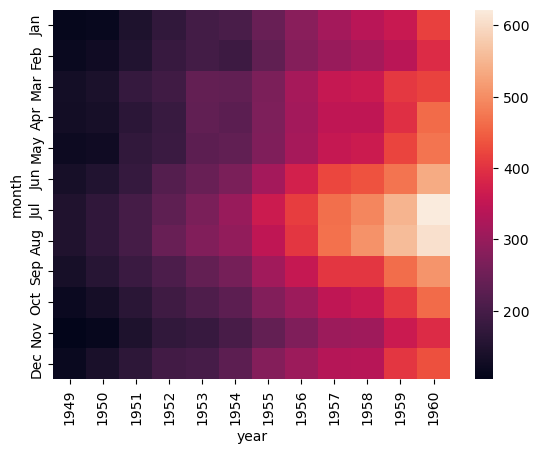

In [28]:
# Heatmap 
sns.heatmap(flights.pivot_table(values = "passengers" , index = "month" , columns= "year"))

In [25]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
